In [11]:
import cv2
import glob
import pickle
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
skip_training = False

In [13]:
device = torch.device('cpu')
#device = torch.device('cuda:0')

In [14]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/Alive_Reckoning")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1_mlp_pytorch.ipynb			  GMouse_Win_UsersGuide-V11.pdf
Alive_Reckoning_manual_GroundTruth.ipynb  Images
Alive_Reckoning_manual_prediction.ipynb   particle_filter_mean_1000.txt
AliveReckoning_MLP			  particle_filter_mean.txt
Alive-Reckoning_mlp.ipynb		  robot4_motors.txt
DR					  robot4_reference.txt
DR_1000


In [15]:
with open('DR_1000', 'wb') as g:
  pickle.dump(val_1000, g)

In [16]:
#Read the data and store it in array

val = []
with open('particle_filter_mean.txt') as f:
  for i in range(556):
    lines = f.readline()
    lines = lines.split()
    #print(lines[0])
    if lines[0] == 'F':
      val.append(lines[1:])

In [17]:
print(len(val))

278


In [18]:
#Convert stored data from string to integer

for j in range(278):
  for k in range(3):
    val[j][k] = float(val[j][k])

In [19]:
print(val)

[[1773.0, 1878.0, -2.499], [1767.0, 1878.0, -2.495], [1764.0, 1888.0, -2.488], [1759.0, 1893.0, -2.482], [1757.0, 1895.0, -2.48], [1755.0, 1900.0, -2.476], [1754.0, 1899.0, -2.474], [1755.0, 1899.0, -2.475], [1754.0, 1899.0, -2.474], [1754.0, 1899.0, -2.474], [1754.0, 1899.0, -2.474], [1754.0, 1899.0, -2.474], [1754.0, 1899.0, -2.474], [1735.0, 1885.0, -2.491], [1706.0, 1864.0, -2.5], [1682.0, 1846.0, -2.499], [1654.0, 1825.0, -2.489], [1654.0, 1825.0, -2.49], [1619.0, 1799.0, -2.5], [1586.0, 1776.0, -2.504], [1559.0, 1755.0, -2.502], [1534.0, 1736.0, -2.512], [1533.0, 1736.0, -2.512], [1494.0, 1707.0, -2.509], [1456.0, 1680.0, -2.51], [1459.0, 1682.0, -2.523], [1418.0, 1653.0, -2.525], [1392.0, 1636.0, -2.549], [1366.0, 1619.0, -2.549], [1331.0, 1594.0, -2.541], [1298.0, 1571.0, -2.529], [1295.0, 1569.0, -2.533], [1252.0, 1539.0, -2.538], [1208.0, 1507.0, -2.53], [1167.0, 1478.0, -2.53], [1169.0, 1479.0, -2.535], [1146.0, 1465.0, -2.541], [1114.0, 1443.0, -2.541], [1090.0, 1427.0, -2.

In [20]:
with open('DR', 'wb') as g:
  pickle.dump(val, g)

In [21]:
#Create an array of delta 

delta = np.zeros_like(val)

for i in range(277):
  for j in range(3):
    delta[i][j] = val[i+1][j] - val[i][j]

In [22]:
#Calculate vector length and angle array
vector = np.zeros((delta.shape[0],2))

for i in range(delta.shape[0]):
  vector[i,0] = np.sqrt(delta[i,0]**2 + delta[i,1]**2)
  vector[i,1] = val[i][2]


In [23]:
print(vector) #Magnitude || Angle

[[ 6.00000000e+00 -2.49900000e+00]
 [ 1.04403065e+01 -2.49500000e+00]
 [ 7.07106781e+00 -2.48800000e+00]
 [ 2.82842712e+00 -2.48200000e+00]
 [ 5.38516481e+00 -2.48000000e+00]
 [ 1.41421356e+00 -2.47600000e+00]
 [ 1.00000000e+00 -2.47400000e+00]
 [ 1.00000000e+00 -2.47500000e+00]
 [ 0.00000000e+00 -2.47400000e+00]
 [ 0.00000000e+00 -2.47400000e+00]
 [ 0.00000000e+00 -2.47400000e+00]
 [ 0.00000000e+00 -2.47400000e+00]
 [ 2.36008474e+01 -2.47400000e+00]
 [ 3.58050276e+01 -2.49100000e+00]
 [ 3.00000000e+01 -2.50000000e+00]
 [ 3.50000000e+01 -2.49900000e+00]
 [ 0.00000000e+00 -2.48900000e+00]
 [ 4.36004587e+01 -2.49000000e+00]
 [ 4.02243707e+01 -2.50000000e+00]
 [ 3.42052628e+01 -2.50400000e+00]
 [ 3.14006369e+01 -2.50200000e+00]
 [ 1.00000000e+00 -2.51200000e+00]
 [ 4.86004115e+01 -2.51200000e+00]
 [ 4.66154481e+01 -2.50900000e+00]
 [ 3.60555128e+00 -2.51000000e+00]
 [ 5.02195181e+01 -2.52300000e+00]
 [ 3.10644491e+01 -2.52500000e+00]
 [ 3.10644491e+01 -2.54900000e+00]
 [ 4.30116263e+01 -2

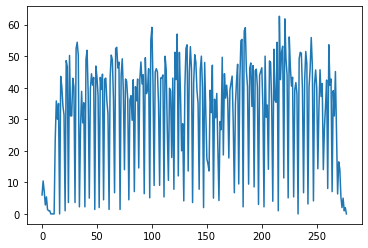

In [24]:
#length of vector
x = range(len(vector))
plt.plot(x, vector[:,0])

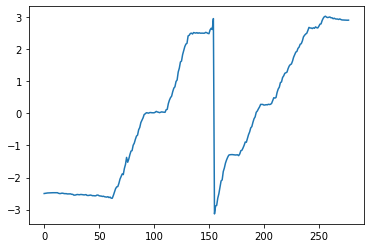

In [25]:
#angle of vector
plt.plot(x, vector[:,1])

In [26]:
x = []
y = []
for i in val:
  x.append(i[0])
  y.append(i[1])

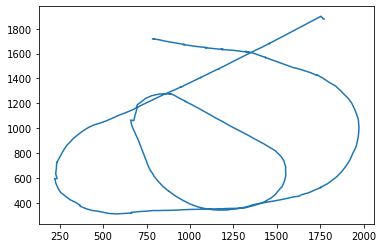

In [27]:
plt.plot(x, y)

In [28]:
k = 0
#print(np.mean(vector[12,0]))
print(vector[12])

[23.60084744 -2.474     ]


In [29]:
#Alive Reckoning(Incorporating inertia)
def inertia(angle, dist):
  wt_ang = 0.28
  wt_vel = 0.1
  diff_ang = (angle[0] - angle[2])*wt_ang
  diff_vel = (dist[0] + dist[1] + dist[2])*wt_vel/3
  sum = diff_ang*diff_vel
  print(sum)

  
  if abs(sum)>=0.23:
    angle[0]+=sum/3
    angle[1]+=sum/3
    angle[2]+=sum/3

  return angle





In [30]:
#ALive Reckoning(incorporating 4 previous data)[Mean and Variance]
weight = 10
updt_vector = np.copy(vector)
for k in range(len(vector)-5):

  #updt_vector[k:k + 3,1] = inertia(updt_vector[k:k + 3,1])
  m = np.mean(vector[k:k+4,0])
  var1 = (vector[k,0] - m)**2
  var2 = (vector[k+1,0] - m)**2
  var3 = (vector[k+2,0] - m)**2
  var4 = (vector[k+3,0] - m)**2

  if var1 == 0:
    var1 = 0.001
  if var2 == 0:
    var2 = 0.001
  if var3 == 0:
    var3 = 0.001
  if var4 == 0:
    var4 = 0.001

  temp = ((vector[k,0]*0.1/var1) + (vector[k+1,0]*0.2/var2) + (vector[k+2,0]*0.3/var3) + (vector[k+3,0]*0.4/var4))/((0.1/var1)+(0.2/var2)+(0.3/var3)+(0.4/var4))
  #temp = vector[k,0]*0.1 + vector[k+1,0]*0.2 + vector[k+2,0]*0.3 + vector[k+3,0]*0.4
  #temp = (vector[k,0]*1 + vector[k+1,0]*3 + vector[k+2,0]*5 + vector[k+3,0]*7)/16
  updt_vector[k + 4,0] = (temp*weight + vector[k+5,0])/(weight + 1)

  #updt_vector[k:k + 3,1] = inertia(updt_vector[k:k + 3,1])
  m = np.mean(vector[k:k+4,1])
  var1 = (vector[k,1] - m)**2
  var2 = (vector[k+1,1] - m)**2
  var3 = (vector[k+2,1] - m)**2
  var4 = (vector[k+3,1] - m)**2

  if var1 == 0:
    var1 = 0.001
  if var2 == 0:
    var2 = 0.001
  if var3 == 0:
    var3 = 0.001
  if var4 == 0:
    var4 = 0.001

  temp = ((vector[k,1]*0.1/var1) + (vector[k+1,1]*0.2/var2) + (vector[k+2,1]*0.3/var3) + (vector[k+3,1]*0.4/var4))/((0.1/var1)+(0.2/var2)+(0.3/var3)+(0.4/var4))

  #temp = vector[k,1]*0.1 + vector[k+1,1]*0.2 + vector[k+2,1]*0.3 + vector[k+3,1]*0.4
  #temp = (vector[k,1]*1 + vector[k+1,1]*3 + vector[k+2,1]*5 + vector[k+3,1]*7)/16
  updt_vector[k + 4,1] = (temp*weight + vector[k+5,1])/(weight + 1)

  updt_vector[k:k + 3,1] = inertia(updt_vector[k:k + 3,1],updt_vector[k:k + 3,0])
print(updt_vector)

-0.002413834430266366
-0.002467895908723344
3.226490521272084e-05
0.000426179610072394
-0.0010704332692268136
-0.0009210955484331663
-0.00036834371098441444
-8.958072102067728e-05
-3.61386593068383e-05
-2.3082759281418192e-05
8.068887532006204e-05
0.00021119621951030832
0.0004856291904873554
0.005458356259217302
0.014230055465755348
0.005409545717367015
-0.003497178206658408
-0.000460141171132585
0.005302343352890958
0.0064992271666129975
0.004866292979910252
0.007286836234770746
0.0052346467405674285
0.0018230430776478472
0.004583297359878605
0.010106617177728495
0.011521170219301158
0.01694285155693537
0.020108693514962857
0.0006505954237307064
-0.010477025688054711
-0.0064106559779113816
-0.004183092539489168
-0.001453191712548067
0.0016664955184584706
0.0009812764322131068
0.003444537023007648
0.004057389390561346
0.0030273123527958844
0.010274894369224612
0.012193121726416772
0.0056606419591023445
-0.00038024099855327734
0.0002954021007155163
0.005182428748982553
0.008066266801950

In [31]:
#print(updt_vector[65:68,1])
#print(inertia(updt_vector[65:68,1]))

In [32]:
#Updated coordinate
updt_cord = []

for i in range(len(updt_vector)):
  x_updt = x[i] + updt_vector[i,0]*np.cos(updt_vector[i,1])
  y_updt = y[i] + updt_vector[i,0]*np.sin(updt_vector[i,1])
  updt_cord.append((x_updt, y_updt))

In [33]:
print(updt_cord)

[(1768.1967315424151, 1874.4043620699003), (1758.6671606810628, 1871.7100247309886), (1758.3862478648834, 1883.7004899156448), (1756.764858327137, 1891.2667539983513), (1751.9683080940322, 1891.14798280879), (1750.4013038188796, 1896.4563376161866), (1750.9522837349632, 1896.6319805587352), (1753.065818305174, 1897.4843036573764), (1753.1304345458739, 1898.3169182877164), (1753.297979587291, 1898.4474263003196), (1753.7858192183885, 1898.8311605553267), (1752.3063621490999, 1897.664862446236), (1751.440688625144, 1896.9887897651297), (1731.6900752813665, 1882.403305179365), (1689.02752065368, 1850.7114985043163), (1664.6453524632686, 1832.7260705283018), (1628.578361970974, 1805.9148349095913), (1629.2018069992541, 1806.3003579168353), (1593.7730106537185, 1779.904072788188), (1556.357711519144, 1753.624587740691), (1533.3206499280122, 1735.7882343335966), (1504.0334160751768, 1713.6856604694945), (1506.7927396107807, 1716.6013542347202), (1470.379566391908, 1689.6984288471413), (1429.

In [34]:
x_updt = []
y_updt = []

for i in range(len(updt_cord)):
  x_updt.append(updt_cord[i][0])
  y_updt.append(updt_cord[i][1])

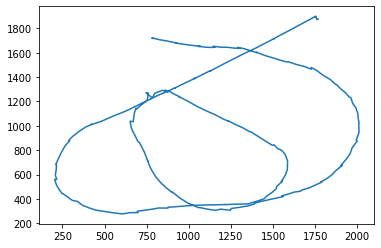

In [35]:
plt.plot(x_updt, y_updt)

<function matplotlib.pyplot.show>

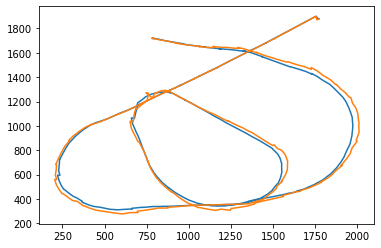

In [36]:
plt.plot(x, y)
plt.plot(x_updt, y_updt)
plt.show

GROUND TRUTH DATA


In [37]:
#Read the data and store it in array (Ground Truth)

val_GT = []
with open('robot4_reference.txt') as f:
  for i in range(278):
    lines_GT = f.readline()
    lines_GT = lines_GT.split()
    val_GT.append(lines_GT[1:])

In [38]:
#Convert stored data from string to integer

for j in range(278):
  for k in range(3):
    val_GT[j][k] = int(val_GT[j][k])

In [39]:
x_GT = []
y_GT = []
for i in val_GT:
  x_GT.append(i[1])
  y_GT.append(i[2])

In [40]:
print(x_GT[0])
print(y_GT[0])

1850
1897


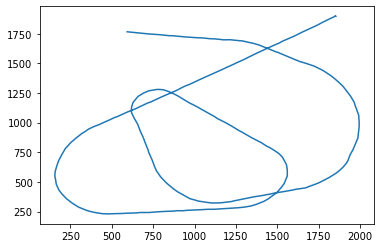

In [41]:
plt.plot(x_GT, y_GT)

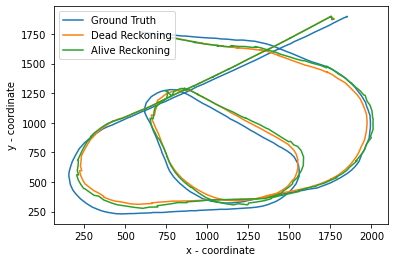

In [42]:
plt.plot(x_GT, y_GT, label = "Ground Truth")#Ground Truth
plt.plot(x, y, label = "Dead Reckoning")#Dead Reckoning
plt.plot(x_updt, y_updt, label = "Alive Reckoning")#Alive Reckoning
plt.xlabel('x - coordinate')
plt.ylabel('y - coordinate')
plt.legend()
plt.show
plt.savefig('foo.pdf')

In [43]:
#Error

def RMSE(inp1, inp2, inp3, inp4):
  inp1 = np.array(inp1)
  inp2 = np.array(inp2)
  inp3 = np.array(inp3)
  inp4 = np.array(inp4)
  rmse_err = np.mean(np.sqrt((inp1 - inp2)**2 + (inp3 - inp4)**2))
   
  return rmse_err

In [44]:
GT_DR = RMSE(x_GT, x, y_GT, y)#GT||DR

In [45]:
print(GT_DR)

83.23155552581333


In [46]:
GT_AR = RMSE(x_GT, x_updt, y_GT, y_updt)#GT||AR

In [47]:
print(GT_AR)

67.14883171982837


In [48]:
Err_Red = (GT_AR - GT_DR)*100/GT_DR

In [49]:
print(Err_Red)# in percent

-19.322868237152065
